## Support Vector Machines

This tutorial shows an example of SVM Classification using python's scikit-learn module. 

First import required packages:

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import linalg
from scipy import io

In [2]:
from sklearn import linear_model as lmd

Load Data:

In [3]:
InFile1          = '../data/PaulGader/LinSepC1.mat'
InFile2          = '../data/PaulGader/LinSepC2.mat'
C1Dict           = io.loadmat(InFile1)
C2Dict           = io.loadmat(InFile2)
C1               = C1Dict['LinSepC1']
C2               = C2Dict['LinSepC2']
NSampsClass    = 200
NSamps         = 2*NSampsClass

In [4]:
### Set Target Outputs ###
#1st 200 are +1 , 2nd 200 are -1
TargetOutputs                     =  np.ones((NSamps,1))
TargetOutputs[NSampsClass:NSamps] = -TargetOutputs[NSampsClass:NSamps]
AllSamps     = np.concatenate((C1,C2),axis=0)
AllSamps.shape

(400, 2)

In [5]:
# Make an instance of this object
M = lmd.LinearRegression()
print(M) #M is a LinearRegression class
LinMod = M.fit(AllSamps, TargetOutputs,sample_weight=None)
print(LinMod)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


In [6]:
# LinMod = lmd.LinearRegression.fit(M, AllSamps, TargetOutputs, sample_weight=None)

# pass by reference: saves memory; pointer to data
# pass by value: makes a copy and passes in
# need to include M as an input -- 1st argument is "self" 
# defines class that it is fitting -> this is a linear regression

In [7]:
# Score - give R^2 value
R = lmd.LinearRegression.score(LinMod, AllSamps, TargetOutputs, sample_weight=None)
print(R)

0.911269176982


In [8]:
LinMod

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
w = LinMod.coef_
print('coefficients:',w)

coefficients: [[ 0.81592447  0.94178188]]


In [10]:
w0 = LinMod.intercept_
print('intercept:',w0)

intercept: [-0.01663028]


### Question:  How would we compute the outputs of the regression model?

Learn About Kernels

Do some SVM Classification

In [11]:
from sklearn.svm import SVC

In [12]:
### SVC wants a 1d array, not a column vector
Targets = np.ravel(TargetOutputs)  #flatten using np.ravel

In [13]:
InitSVM = SVC() #initialize SVM
InitSVM

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

C is the slack variable. Since we are minimizing the funciton ..., if C is large, zeta must be small --> less slack. 

In [14]:
#Train
TrainedSVM = InitSVM.fit(AllSamps, Targets)

In [15]:
#Predict
y = TrainedSVM.predict(AllSamps)

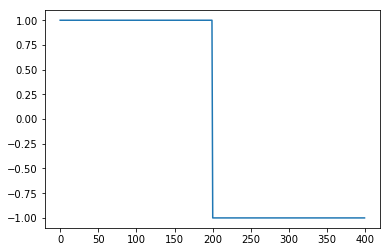

In [16]:
#Plot linearly seperable practice data. SVM solves it well. 
plt.figure(1)
plt.plot(y)
plt.show()

In [17]:
#make a decision function
d = TrainedSVM.decision_function(AllSamps)

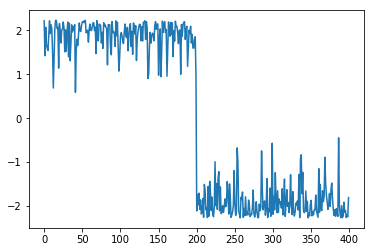

In [18]:

plt.figure(1)
plt.plot(d)
plt.show()

Can try it with Outliers if we have time

Let's look at some spectra from real data collected at OSBS:

In [19]:
### Look at some Pine and Oak spectra from
### NEON Site D03 Ordway-Swisher Biological Station
### at UF
### Pinus palustris
### Quercus virginiana
InFile1 = '../data/PaulGader/Pines.mat'
InFile2 = '../data/PaulGader/Oaks.mat'
C1Dict  = io.loadmat(InFile1)
C2Dict  = io.loadmat(InFile2)
Pines   = C1Dict['Pines']
Oaks    = C2Dict['Oaks']

In [20]:
WvFile  = '../data/PaulGader/NEONWvsNBB.mat'
WvDict  = io.loadmat(WvFile)
Wv      = WvDict['NEONWvsNBB']

In [21]:
print('shape of pines data:',Pines.shape)
print('shape of oaks data:',Oaks.shape)

shape of pines data: (809, 346)
shape of oaks data: (1731, 346)


In [22]:
NBands=Wv.shape[0]
print('number of bands:',NBands)

number of bands: 346


Notice that these training sets are unbalanced

In [23]:
# Take a subset of 600 samples for training and 200 for testing
NTrainSampsClass = 600
NTestSampsClass  = 200
Targets          = np.ones((1200,1))
Targets[range(600)] = -Targets[range(600)]
Targets             = np.ravel(Targets)
print(Targets.shape)

(1200,)


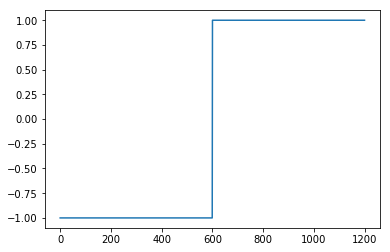

In [24]:
plt.figure(11)
plt.plot(Targets)
plt.show()

In [25]:
TrainPines = Pines[0:600,:]
TrainOaks  = Oaks[0:600,:]
#TrainSet   = np.concatenate?

In [26]:
#concatenate training data
TrainSet   = np.concatenate((TrainPines, TrainOaks), axis=0)
print(TrainSet.shape)

(1200, 346)


1200 training patterns each with 346 dimensions

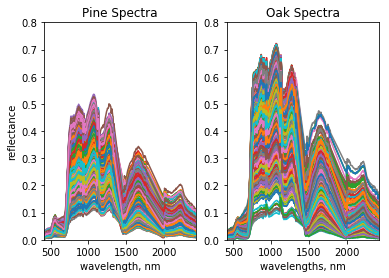

In [27]:
plt.figure(3)
### Plot Pine Training Spectra ###
plt.subplot(121)
plt.plot(Wv, TrainPines.T); plt.title('Pine Spectra')
plt.xlabel('wavelength, nm'); plt.ylabel('reflectance')
plt.ylim((0.0,0.8))
plt.xlim((Wv[1], Wv[NBands-1]))
### Plot Oak Training Spectra ###
plt.subplot(122)
plt.plot(Wv, TrainOaks.T); plt.title('Oak Spectra')
plt.ylim((0.0,0.8))
plt.xlim((Wv[1], Wv[NBands-1]))
plt.xlabel('wavelengths, nm')
plt.show()

There is overlap between the spectral signatures of these two training sets. This could be due to precense of shadows, understory, etc.

In [28]:
# Look at Support Vector Classification function
SVC?
# C: Penalty parameter C of the error term

In [29]:
# Initialize, 
# InitSVM= SVC() #run with default C to start, then change
# C is a ...
InitSVM= SVC(C=500) #SVC: S Vector Classifiers, change C for lazy fix
TrainedSVM=InitSVM.fit(TrainSet, Targets)
d = TrainedSVM.decision_function(TrainSet) 
#decision function gives probabalistic values

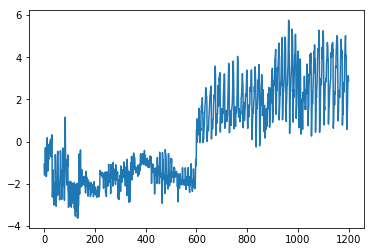

In [30]:
# Plot
plt.figure(4)
plt.plot(d)
plt.show()

Plot looks not that great. Seems to be doing slightly better on class 1.  Class 2 is all over the place. There are a few things you can do:
1. look at errors
2. be lazy and change value of C to 500. 

Does this seem to be too good to be true?

Could be that there are pixels in the training data that are not leaves or pine needles and there may be a lot of mixed pixels (eg. branches, leaves, understory, ground ...). Best to draw polygons around known objects and only use pixels within the polygons for classification. Or use NDVI thresholds, extract spectra from the limbs, or tree structure (eg. LiDAR data can give useful info about the tree type). 

In [31]:
TestPines = Pines[600:800,:]
TestOaks  = Oaks[600:800,:]

In [32]:
TestSet = np.concatenate((TestPines, TestOaks), axis=0)
print('Test Set Shape:',TestSet.shape)
dtest = TrainedSVM.decision_function(TestSet)

Test Set Shape: (400, 346)


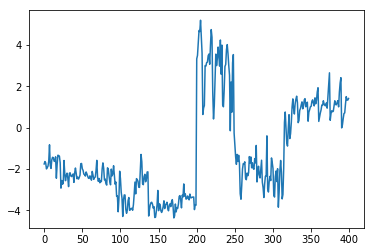

In [33]:
plt.figure(5)
plt.plot(dtest)
plt.show()

Yeah, too good to be true...What can we do?

Error Analysis: identify characteristics of errors, try different magic numbers using cross validation, etc.

### Links and References:

Scikit-Learn: http://scikit-learn.org/stable/

Bishop, Christopher M. 2006. Pattern Recognition and Machine Learning (Information Science and Statistics). Springer-Verlag New York, Inc.